In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


In [7]:
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

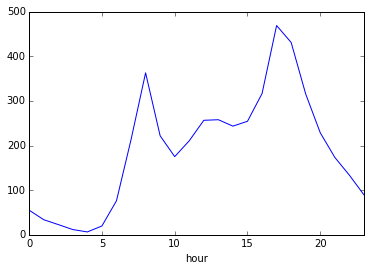

In [9]:
bikes.groupby('hour').total.mean().plot()

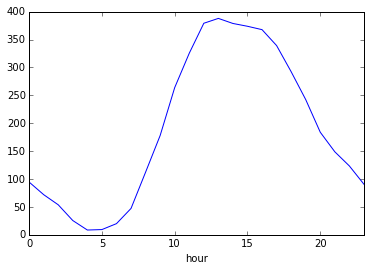

In [15]:
bikes[bikes.workingday == 0].groupby('hour').total.mean().plot()

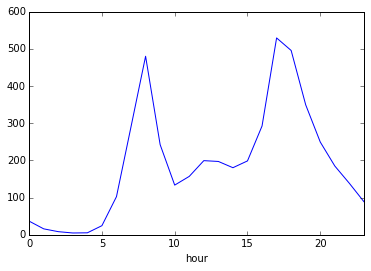

In [14]:
bikes[bikes.workingday == 1].groupby('hour').total.mean().plot()

##Task 3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [17]:
features = ['hour', 'workingday']
X = bikes[features]
y = bikes.total

In [19]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
linreg.coef_

array([ 10.49206282,   4.07248627])

##Task 4

Use 10-fold cross-validation to calculate the RMSE for the linear regression model.

In [23]:
scores = cross_val_score(linreg, X, y, cv=10, scoring='mean_squared_error')
print (scores)

[-26235.00002318 -16811.5716471  -16956.05469171 -16911.35102566
 -16054.77889365 -18418.26180566 -39478.13750574 -47868.25888957
 -56063.65054817 -33732.43717146]


In [27]:
print(np.mean(np.sqrt(-scores)))

165.223286689


##Task 5

Use 10-fold cross-validation to evaluate a decision tree model with those same features (fit to any "max_depth" you choose).

In [28]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [29]:
# use cross-validation to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

107.57576561312104

In [41]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)  #Max number of possible splits is 10. Provides best result.
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

107.57576561312104

##Task 6

Fit a decision tree model to the entire dataset using "max_depth=3", and create a tree diagram using Graphviz. Then, figure out what each leaf represents. What did the decision tree learn that a linear regression model could not learn?

In [44]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)  #Max number of possible splits is 10. Provides best result.
treereg.fit(X, y)

# create a Graphviz file
export_graphviz(treereg, out_file='tree_bikes.dot', feature_names=features)

* **At the command line, run this to convert to PNG:**
* **   dot -Tpng tree_vehicles.dot -o tree_vehicles.png**

<img src="tree_bikes.png"/> 
[Bikes Tree](tree_bikes.png)